# Example 2.1: Pullout from rigid matrix
## BC1 and no free length
This example shows the analytically solved model - the simplest possible configuration 

In [1]:
%reset -f
import sympy as sp
import numpy as np
from IPython.display import display
from sympy.plotting import plot as splot, plot3d as splot3d
sp.init_printing()

## Variables involved in the boundary value problem
#### Geometrical parameters
-  $A_\mathrm{f}$ | Cross section area modulus of the reinforcement
-  $p$: Perimeter of the reinforcement
-  $L_\mathrm{f}$: Free length of the pulled-out bar

#### Coordinate variable
-  $x$: Longitudinal coordinate

#### Material parameters
-  $E_\mathrm{f}$: Young's modulus of the reinforcement
-  $\tau$: Frictional bond stress

#### Control parameter
-  $P, w$: Pullout force, pullout displacement

#### State parameter
-  $a$: Length of the debonded zone

#### Integration constants
-  $C,D$: Integration constants to be resolved through boundary and continuity conditions

In [2]:
E_f, A_f, tau, p = sp.symbols('E_f, A_f, tau, p')
C, D = sp.symbols('C, D')
P, w = sp.symbols('P, w')
x, a, L_b = sp.symbols('x, a, L_b')

## Embedded length: equilibrium, elasticity and compatibility 
In the halfspace $x \in (-\infty, 0)$ the governing equations take the folowing form:<br>
__Equilibrium__: The equilibrium equation along the free length of the bar introduces the equivalence between the normal force in the reinforcement $\sigma_\mathrm{f} A_\mathrm{f}$ and and the bond intensity within an ifinitesimal element $\mathrm{d}x$
\begin{align}
\frac{\partial \sigma_\mathrm{f}}{\partial x} &= \frac{p \tau}{A_\mathrm{f}}.
\end{align}
By integrating this equation we obtain the stress as an unknown constant
\begin{align}
\sigma_\mathrm{f}(x) &=  \frac{p \tau}{A_\mathrm{f}} x + C.
\end{align}
__Elasticity__: Assuming linear elastic behavior with the Young's modulus $E_\mathrm{f}$ we obtain the strain $\varepsilon$ as
\begin{align}
\varepsilon_\mathrm{f}(x) = \frac{1}{E_\mathrm{f}} \left(\frac{p \tau}{A_\mathrm{f}} x + C \right).
\end{align}
__Kinematics__: The displacement of the bar within the free length is obtained as an integral
\begin{align}
u_\mathrm{f}(x) = 
\frac{p \tau x^{2}}{2 A_\mathrm{f} E_\mathrm{f}} + \frac{C x}{E_{\mathrm{f}}} + D 
\end{align}

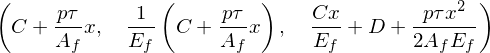

In [3]:
d_sig_f = p * tau / A_f
sig_f = sp.integrate(d_sig_f, x) + C
eps_f = sig_f / E_f
u_f = sp.integrate(eps_f, x) + D
sig_f, eps_f, u_f # check

### Resolving for integration constants (step 1)
__Condition 1__: Stress in the free length must be equal to $\sigma(0) = P/A_\mathrm{f}$.<br> 

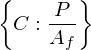

In [4]:
eq_C = {P - sig_f.subs({x:0}) * A_f}
C_subs = sp.solve(eq_C,{C})
C_subs # display the result

### Resolving for integration constants (step 2)
The solution for the integration constant $D$ requires a second thought. Can we say something about how does the displacement approach zero within the embedded length? 

__Condition 2__: We can postulate, that at some unkonwn distance $a$, the slip between the reinforcement and the matrix will be zero, i.e. $u_\mathrm{f}(a) = 0$.

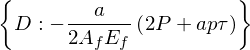

In [5]:
eqns_D = {u_f.subs(C_subs).subs({x:a})}
D_subs = sp.solve(eqns_D,{D})
D_subs

However, this postulate does not solve the problem. This additional condition has introduced an additional uknown parameter $a$ so that the problem is still not solvable and another boundary or continuity condition needs to be found.

__Condition 3__: We futher postulate, that also the strain $\varepsilon$ vanishes at the same distance $a$ as displacement reaches zero. i.e. $\varepsilon_\mathrm{f}(a) = 0$.

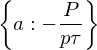

In [6]:
eqns_a = {eps_f.subs(C_subs).subs(D_subs).subs({x:a})}
a_subs = sp.solve(eqns_a,{a})
a_subs

Now all the unknown parameters are resolved. Lets put them all into a single dictionary called var_subs for convenience to avoid long substitution expressions to derive $u_\mathrm{f}$, $\varepsilon_\mathrm{f}$ and $\sigma_\mathrm{f}$.

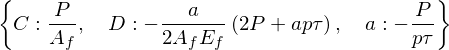

In [7]:
var_subs = {}
[var_subs.update(var) for var in [C_subs,D_subs,a_subs]]
var_subs

With the known values of integration parameters we can resolve the sought displacement fields and plot it 

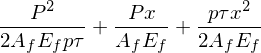

In [8]:
u_f_x = u_f.subs(var_subs)
u_f_x

Substitute for all the material and geometry parameters and the load P the value 1 and plot the curve

In [9]:
data_f = dict(L_b=1, p = 1, E_f = 1, A_f = 1, tau = 1)
splot( u_f_x.subs(data_f).subs({P:1}), (x,-2,0) )

Using the Heaviside step function $\theta(x)$ we can conveniently obtain a single function covering the domain of $x$ piece by piece.
\begin{align}
  u_\mathrm{fa} & = \left\{
  \begin{array}{ll}
  u_\mathrm{f}(x) & \iff x < 0 \land x > a, \; \mathrm{where} \; a = -\frac{P}{p\tau}, \\
  0      & \mathrm{otherwise}
  \end{array}
  \right.
\end{align}
Using the Heaviside function, we can write this in a more compact way as folows
\begin{align}
  u_\mathrm{fa} & = u_\mathrm{f} \, \theta(-x) \, \theta(x - a)
\end{align}

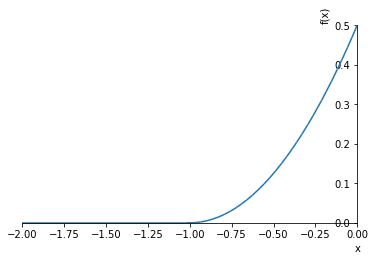

In [10]:
u_fa_x = u_f_x * sp.Heaviside(x-var_subs[a])
splot(u_fa_x.subs(data_f).subs({P:1}), (x,-2,0) )

In [11]:
eps_fa_x = sp.diff(u_fa_x,x)
sig_fa_x = 1 / E_f * eps_fa_x

## Problem solved - lets present the results
Define concrete values of the model parameters 

In [12]:
u_fa_x_data = u_fa_x.subs(data_f)
eps_fa_x_data = eps_fa_x.subs(data_f)
sig_fa_x_data = sig_fa_x.subs(data_f)

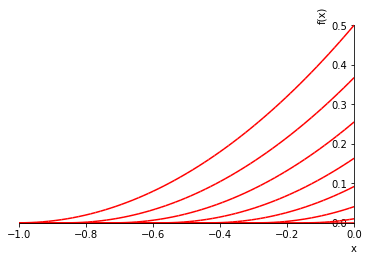

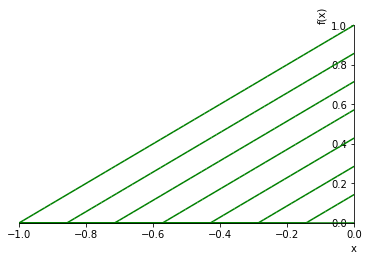

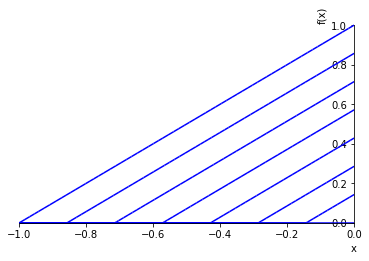

In [13]:
P_levels = np.linspace(0,1,8)
u_f_list = [u_fa_x_data.subs({P: Pl}) for Pl in P_levels] + [(x,-1,0)]
splot(*u_f_list, line_color='red')
eps_f_list = [eps_fa_x_data.subs({P: Pl}) for Pl in P_levels] + [(x,-1,0)]
splot(*eps_f_list, line_color='green')
sig_f_list = [sig_fa_x_data.subs({P: Pl}) for Pl in P_levels] + [(x,-1,0)]
splot(*sig_f_list, line_color='blue')

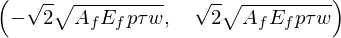

In [14]:
P_push, P_pull = sp.solve(u_f_x.subs({x:0})-w, P)
sp.simplify(P_push), sp.simplify(P_pull)

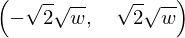

In [15]:
PW_push = P_push.subs(data_f)
PW_pull = P_pull.subs(data_f)
PW_push, PW_pull

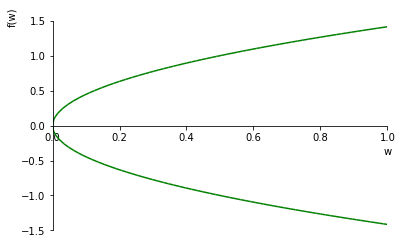

In [16]:
splot(PW_push, PW_pull, (w,0,1), line_color='green')

## Introduce finite embedded length

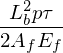

In [17]:
P_max = sp.solve(var_subs[a] + L_b, P)[0]
w_argmax = sp.solve(P_max - P_pull, w)[0]
w_argmax

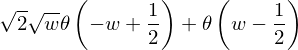

In [18]:
P_pull_Lb = sp.Heaviside(w_argmax - w) * P_pull + sp.Heaviside(w - w_argmax) * P_max
PW_pull_Lb = P_pull_Lb.subs(data_f)
PW_pull_Lb

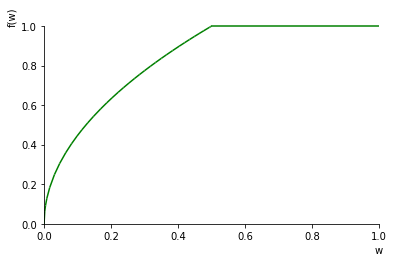

In [19]:
splot(PW_pull_Lb, (w,0,1), line_color='green')

## BC3: Clamp the reinforcement

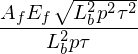

In [20]:
d_P_dw = sp.diff(P_pull,w)
K_c = d_P_dw.subs({w:w_argmax})
sp.simplify(K_c)

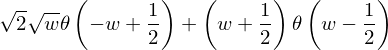

In [21]:
P_pull_clamped = (sp.Heaviside(w_argmax - w) * P_pull + 
       sp.Heaviside(w - w_argmax) * (P_max + K_c * (w - w_argmax)))
PW_pull_clamped = P_pull_clamped.subs(data_f)
PW_pull_clamped

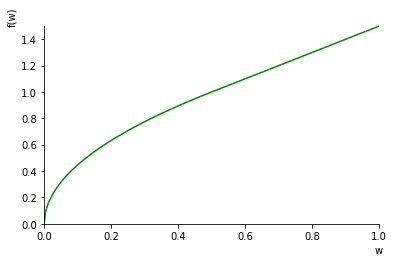

In [22]:
splot(PW_pull_clamped, (w,0,1), line_color='green')